# Chemspace Explorer Initialization

In [19]:
import sys
import os

# Get path to the inner ms_chemical_space_explorer directory
CHEMSPACE_EXPLORER_FOLDER = os.path.abspath(os.path.join(os.getcwd(), '../ms_chemical_space_explorer/ms_chemical_space_explorer'))
DATA_FOLDER = "data"
PROCESSED_DATA_FOLDER = "processed"
FILENAME = os.path.join(CHEMSPACE_EXPLORER_FOLDER, "..", DATA_FOLDER, PROCESSED_DATA_FOLDER, "1000_test_spectra.mgf")
PICKLE = "pickle"

print(f"Adding to path: {CHEMSPACE_EXPLORER_FOLDER}")
sys.path.append(CHEMSPACE_EXPLORER_FOLDER)

Adding to path: c:\Users\kevin\OneDrive - Hochschule Düsseldorf\MMI\Master-Arbeit\Code\ms_chemical_space_explorer\ms_chemical_space_explorer


In [20]:
import pickle
from chemical_space_explorer import start_workflow, run_analogue_search

def analogue_search(n: int = 2):
    file = os.path.join(PICKLE, f'results_n={n}.pkl')
    try:
        with open(file, 'rb') as f:
            analogues = pickle.load(f)
            print(f"Loaded analogues from {file}")
    
    except FileNotFoundError:
        explorer = start_workflow(os.path.abspath(os.path.join(CHEMSPACE_EXPLORER_FOLDER, "..", DATA_FOLDER, PROCESSED_DATA_FOLDER)))
        analogues = run_analogue_search(explorer, FILENAME, n)
        
        with open(file, 'wb') as f:
            pickle.dump(analogues, f)
        print(f"Analogues saved to {file}")
        
    return analogues

# Code

## Load Analogues and import methods

In [22]:
analogues = analogue_search(n=3)

Loaded analogues from pickle\results_n=3.pkl


In [23]:
import importlib
import fragment_extractor

# Force reload the module
importlib.reload(fragment_extractor)

# Now import the specific functions
from fragment_extractor import generate_mols_from_spectrum_query, extract_bitvector_fragments_from_analogues

query_spectrum_id: 2, n: 2, threshold: 10, fragments_per_row: 6, debug: False, include_visited_pairs: False


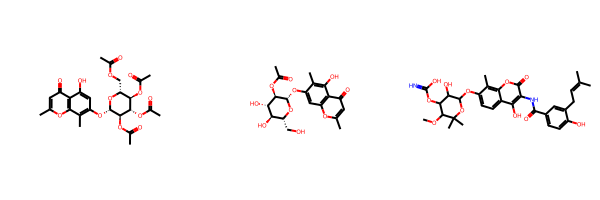

In [24]:
from rdkit.Chem.Draw import MolsToGridImage

threshold = 10
query_spectrum_id = 2
fragments_per_row = 6
debug = False
include_visited_pairs = False

print(
    f"query_spectrum_id: {query_spectrum_id}, n: {2}, threshold: {threshold}, fragments_per_row: {fragments_per_row}, debug: {debug}, include_visited_pairs: {include_visited_pairs}"
)

# Pick analogues for a specific spectrum
analogues_to_visualize = analogues[analogues["query_spectrum_id"] == query_spectrum_id]

# generate rdkit mols and preapre them for visualization
mols = generate_mols_from_spectrum_query(spectrum_query_result=analogues_to_visualize)

MolsToGridImage(mols)

## BitVector Fragments

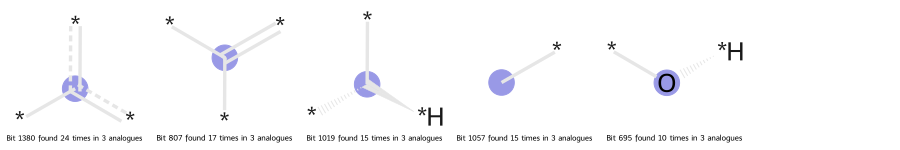

In [25]:
extract_bitvector_fragments_from_analogues(mols, 2, fragments_per_row=fragments_per_row, count_threshold=threshold)

## Spectra Plotting

In [37]:
from chemical_space_explorer import spectra_importer

query_spectra = spectra_importer(FILENAME)

Processing spectra: 100%|██████████| 1000/1000 [00:04<00:00, 249.69it/s]


In [49]:
query_spectra[0].mz

array([336.452271, 337.691528, 339.428162, 460.450745, 467.53891 ,
       518.388428, 602.72229 , 620.670288, 621.356873, 690.731934,
       745.801147, 781.917358, 782.627075])

#### old

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def parse_mgf_spectrum(file_path, spectrum_index=0):
    """Parse a single spectrum from an MGF file.
    
    Args:
        file_path (str): Path to the MGF file
        spectrum_index (int): Index of the spectrum to parse (0-based)
    
    Returns:
        tuple: (metadata dict, m/z array, intensity array)
    """
    with open(file_path, 'r') as f:
        mgf_text = f.read()
    
    spectra = mgf_text.split('BEGIN IONS')
    if spectrum_index + 1 >= len(spectra):
        raise ValueError(f"Spectrum index {spectrum_index} not found. File contains {len(spectra)-1} spectra.")
        
    spectrum_text = spectra[spectrum_index + 1].split('END IONS')[0]
    
    # Extract metadata and peaks
    metadata = {}
    peaks_mz = []
    peaks_intensity = []
    
    for line in spectrum_text.split('\n'):
        line = line.strip()
        if not line:
            continue
            
        if '=' in line:
            key, value = line.split('=', 1)
            metadata[key] = value
        elif line[0].isdigit():
            try:
                mz, intensity = map(float, line.split())
                peaks_mz.append(mz)
                peaks_intensity.append(intensity)
            except ValueError:
                continue  # Skip lines that can't be parsed as peaks
            
    return metadata, np.array(peaks_mz), np.array(peaks_intensity)

def plot_spectrum(mz, intensity, metadata, title=None):
    """Create a mass spectrum plot.
    
    Args:
        mz (array): m/z values
        intensity (array): intensity values
        metadata (dict): spectrum metadata
        title (str, optional): custom title for the plot
    """
    plt.figure(figsize=(12, 6))
    
    # Create stem plot for the spectrum
    markerline, stemlines, baseline = plt.stem(
        mz, 
        intensity,
        use_line_collection=True
    )
    plt.setp(markerline, 'markerfacecolor', 'navy')
    plt.setp(stemlines, 'color', 'navy')
    plt.setp(baseline, 'color', 'gray')
    
    # Set labels and title
    plt.xlabel('m/z')
    plt.ylabel('Relative Intensity')
    if title:
        plt.title(title)
    else:
        compound_name = metadata.get('COMPOUND_NAME', 'Unknown Compound')
        precursor_mz = metadata.get('PRECURSOR_MZ', 'N/A')
        formula = metadata.get('FORMULA', '')
        title_text = f'{compound_name}\nPrecursor m/z: {precursor_mz}'
        if formula:
            title_text += f'\nFormula: {formula}'
        plt.title(title_text)
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()
    
    return plt.gcf()

C:\Users\kevin\AppData\Local\Temp\ipykernel_11244\1890212904.py:58: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(


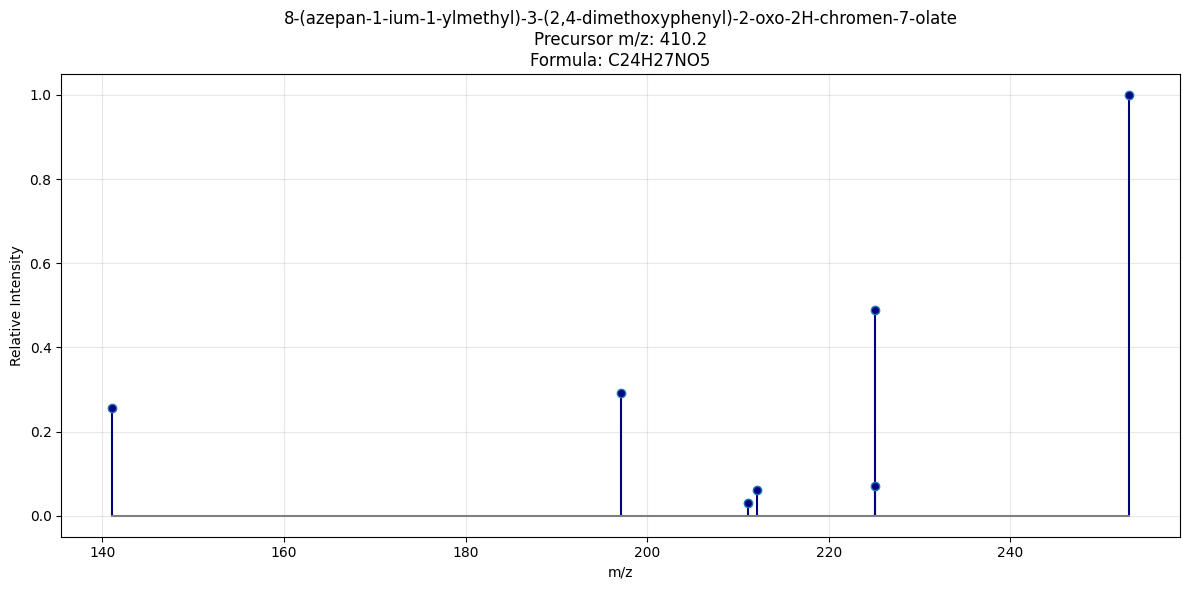


Spectrum Metadata:
Compound: 8-(azepan-1-ium-1-ylmethyl)-3-(2,4-dimethoxyphenyl)-2-oxo-2H-chromen-7-olate
Formula: C24H27NO5
Precursor m/z: 410.2
Adduct: [M+H]+


In [27]:
spectrum_index = 600

# Parse and plot spectrum
metadata, mz, intensity = parse_mgf_spectrum(FILENAME, spectrum_index=spectrum_index)
plot_spectrum(mz, intensity, metadata)
plt.show()

# Print some metadata
print("\nSpectrum Metadata:")
print(f"Compound: {metadata.get('COMPOUND_NAME', 'Unknown')}")
print(f"Formula: {metadata.get('FORMULA', 'Not specified')}")
print(f"Precursor m/z: {metadata.get('PRECURSOR_MZ', 'Not specified')}")
print(f"Adduct: {metadata.get('ADDUCT', 'Not specified')}")

#### matchMS

matplotlib.axes._axes.Axes

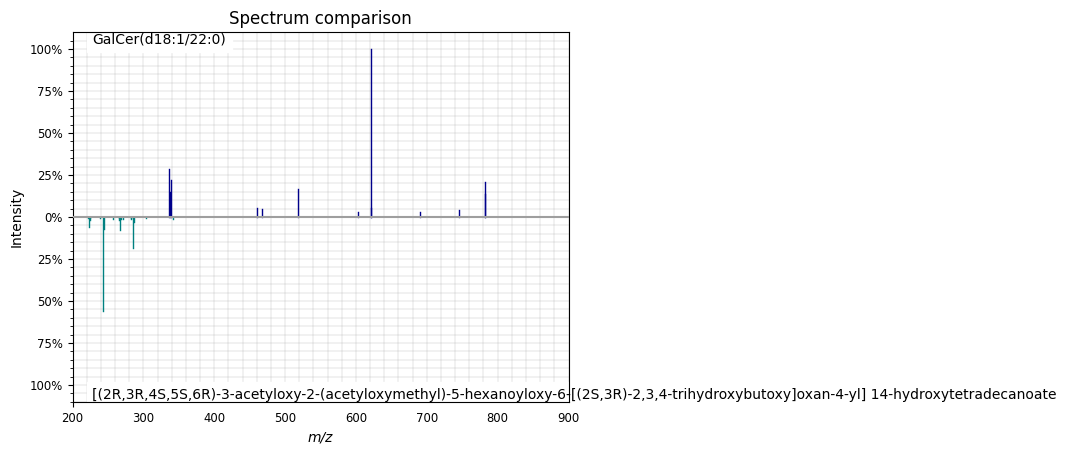

In [44]:
import matchms

type(matchms.plotting.plot_spectra_mirror(query_spectra[0], query_spectra[1]))

(<Figure size 1600x1200 with 1 Axes>,
 <Axes: title={'center': 'Spectrum comparison'}, xlabel='m/z', ylabel='Intensity'>)

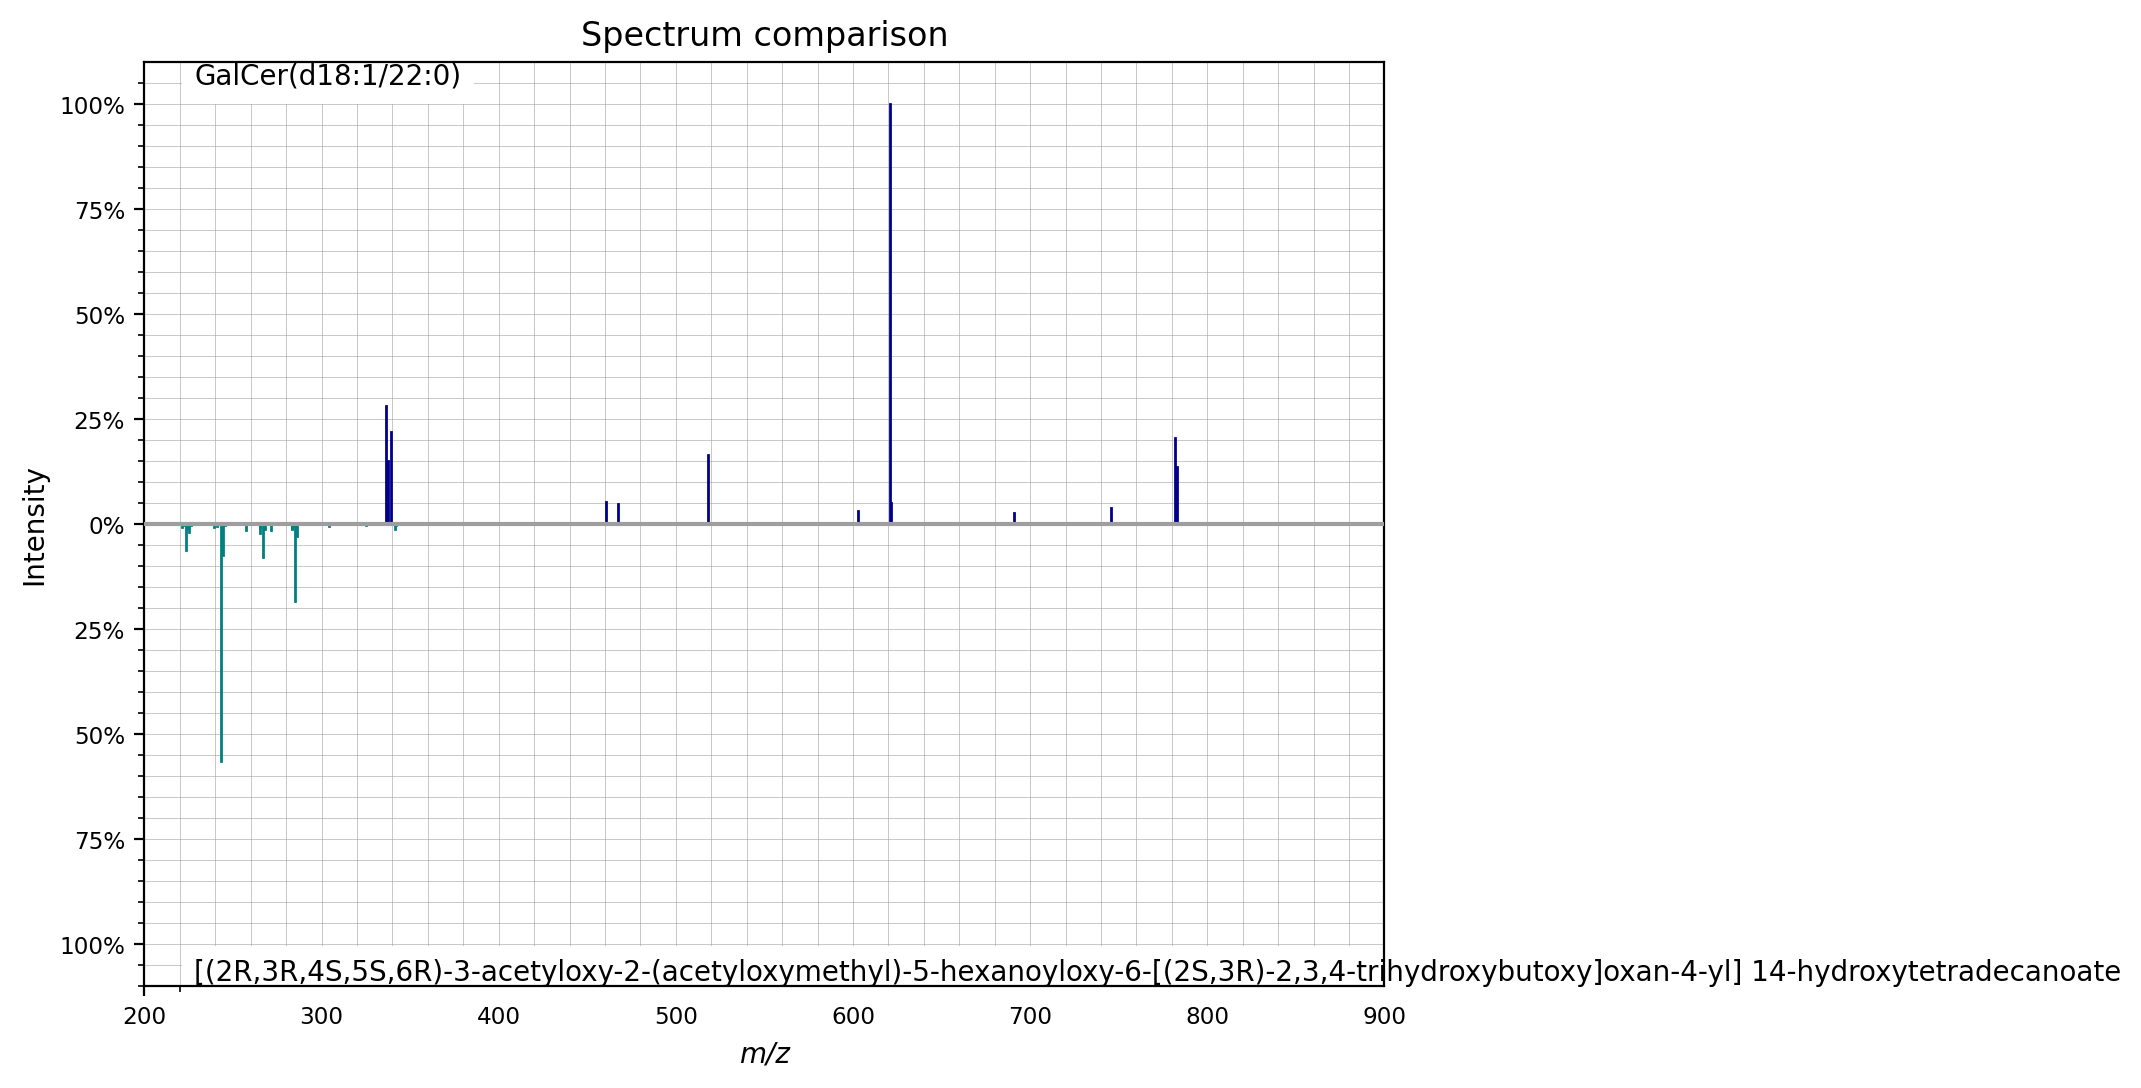

In [38]:
query_spectra[0].plot_against(query_spectra[1])

#### SpectraUtils

matchMS useds spectraUtils code. Might as well use the [original](https://spectrum-utils.readthedocs.io/en/latest/plotting.html) with all the extra functionality including interactive plots.

In [ ]:
import spectrum_utils.spectrum as sus

sus.MsmsSpectrum


'mzspec:PXD004732:01650b_BC2-TUM_first_pool_53_01_01-3xHCD-1h-R2:scan:41840'

In [56]:
import matplotlib.pyplot as plt
import spectrum_utils.plot as sup
import spectrum_utils.spectrum as sus


peptide = "DLTDYLM[Oxidation]K"
usi_top = "mzspec:PXD005175:CRC_iTRAQ_06:scan:11803:VEYTLGEESEAPGQR/3"
spectrum_top = sus.MsmsSpectrum.from_usi(usi_top)
spectrum_top.annotate_proforma(peptide, 0.5, "Da", ion_types="aby")
usi_bottom = "mzspec:MSV000080679:j11962_C1orf144:scan:10671"
spectrum_bottom = sus.MsmsSpectrum.from_usi(usi_bottom)
spectrum_bottom.annotate_proforma(peptide, 0.5, "Da", ion_types="aby")

fig, ax = plt.subplots(figsize=(12, 6))
sup.mirror(spectrum_top, spectrum_bottom, ax=ax)
plt.savefig("mirror.png", dpi=300, bbox_inches="tight", transparent=True)
plt.close()

AttributeError: module 'numba.core.config' has no attribute 'USE_LEGACY_TYPE_SYSTEM'